In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import neighbors

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
df = pd.read_csv("Bike Sharing Dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  object 
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  object 
 7   weekday     17379 non-null  object 
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  object 
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(6), object(7)
memory usage: 2.3+ MB


instant     dteday  season  yr     mnth  hr holiday   weekday workingday  \
0        1  1/01/2011  spring   0  january   0      no  saturday         no   
1        2  1/01/2011  spring   0  january   1      no  saturday         no   
2        3  1/01/2011  spring   0  january   2      no  saturday         no   
3        4  1/01/2011  spring   0  january   3      no  saturday         no   
4        5  1/01/2011  spring   0  january   4      no  saturday         no   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0      clear  0.24  0.2879  0.81        0.0       3          13   16  
1      clear  0.22  0.2727  0.80        0.0       8          32   40  
2      clear  0.22  0.2727  0.80        0.0       5          27   32  
3      clear  0.24  0.2879  0.75        0.0       3          10   13  
4      clear  0.24  0.2879  0.75        0.0       0           1    1

In [14]:
df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

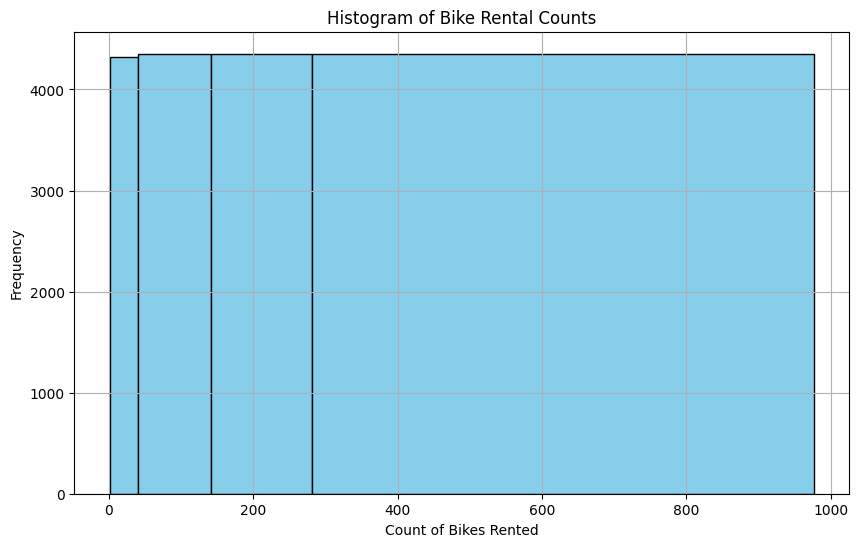

In [15]:
percentiles = [0,25,50,75,100]
custom_bins = [df['cnt'].quantile(p/100) for p in percentiles]

plt.figure(figsize=(10,6))
plt.hist(df['cnt'], bins=custom_bins, color='skyblue', edgecolor='black')

plt.title('Histogram of Bike Rental Counts')
plt.xlabel('Count of Bikes Rented')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
quartiles = [0, 0.25, 0.5, 0.75, 1]
df['quartile'] = pd.qcut(df['cnt'], quartiles, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df.head()

instant     dteday  season  yr     mnth  hr holiday   weekday workingday  \
0        1  1/01/2011  spring   0  january   0      no  saturday         no   
1        2  1/01/2011  spring   0  january   1      no  saturday         no   
2        3  1/01/2011  spring   0  january   2      no  saturday         no   
3        4  1/01/2011  spring   0  january   3      no  saturday         no   
4        5  1/01/2011  spring   0  january   4      no  saturday         no   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt quartile  
0      clear  0.24  0.2879  0.81        0.0       3          13   16       Q1  
1      clear  0.22  0.2727  0.80        0.0       8          32   40       Q1  
2      clear  0.22  0.2727  0.80        0.0       5          27   32       Q1  
3      clear  0.24  0.2879  0.75        0.0       3          10   13       Q1  
4      clear  0.24  0.2879  0.75        0.0       0           1    1       Q1

In [17]:
y = df['quartile']
X = df.drop(['quartile', 'dteday', 'instant', 'cnt', 'registered', 'casual'], axis=1)

scaler = StandardScaler()
X_encoded = pd.get_dummies(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = skl_lm.LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5587
Precision: 0.5450
Recall: 0.5587
F1 Score: 0.5436

Classification Report:
              precision    recall  f1-score   support

          Q1       0.63      0.86      0.73       852
          Q2       0.54      0.40      0.46       926
          Q3       0.44      0.36      0.40       858
          Q4       0.58      0.62      0.60       840

    accuracy                           0.56      3476
   macro avg       0.55      0.56      0.55      3476
weighted avg       0.54      0.56      0.54      3476



In [20]:
#X_scaled = scaler.fit_transform(X_encoded)

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_encoded)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = skl_lm.LogisticRegression(random_state=42, max_iter=1000, solver='sag')

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5357
Precision: 0.5182
Recall: 0.5357
F1 Score: 0.5179

Classification Report:
              precision    recall  f1-score   support

          Q1       0.64      0.86      0.73       852
          Q2       0.48      0.36      0.41       926
          Q3       0.44      0.33      0.38       858
          Q4       0.52      0.61      0.56       840

    accuracy                           0.54      3476
   macro avg       0.52      0.54      0.52      3476
weighted avg       0.52      0.54      0.52      3476



In [24]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = skl_lm.LogisticRegression(random_state=42, max_iter=1000, solver='sag')

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4226
Precision: 0.3730
Recall: 0.4226
F1 Score: 0.3825

Classification Report:
              precision    recall  f1-score   support

          Q1       0.59      0.88      0.71       852
          Q2       0.27      0.20      0.23       926
          Q3       0.39      0.50      0.44       858
          Q4       0.25      0.13      0.17       840

    accuracy                           0.42      3476
   macro avg       0.37      0.43      0.38      3476
weighted avg       0.37      0.42      0.38      3476



In [ ]:
"""
tree_parameters = {
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'criterion': 'gini',
    'random_state': 42
}
"""

tree_model = DecisionTreeClassifier(random_state=42) #**tree_parameters

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [ ]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("\nTree-based Model (Decision Tree) Performance:")
print(f"Accuracy: {accuracy_tree:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))


Tree-based Model (Decision Tree) Performance:
Accuracy: 0.7989
Classification Report:
              precision    recall  f1-score   support

          Q1       0.89      0.89      0.89       852
          Q2       0.76      0.73      0.74       926
          Q3       0.70      0.74      0.72       858
          Q4       0.86      0.84      0.85       840

    accuracy                           0.80      3476
   macro avg       0.80      0.80      0.80      3476
weighted avg       0.80      0.80      0.80      3476



In [ ]:
param_ = {
    'max_depth': [20],
    'min_samples_split': [18],
    'min_samples_leaf': [3],
    'max_features': [None],
    'criterion': ['gini']
}

tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:")
print(grid_search.best_params_)
best_tree_model = grid_search.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.4f}")

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 18}
Accuracy: 0.8165


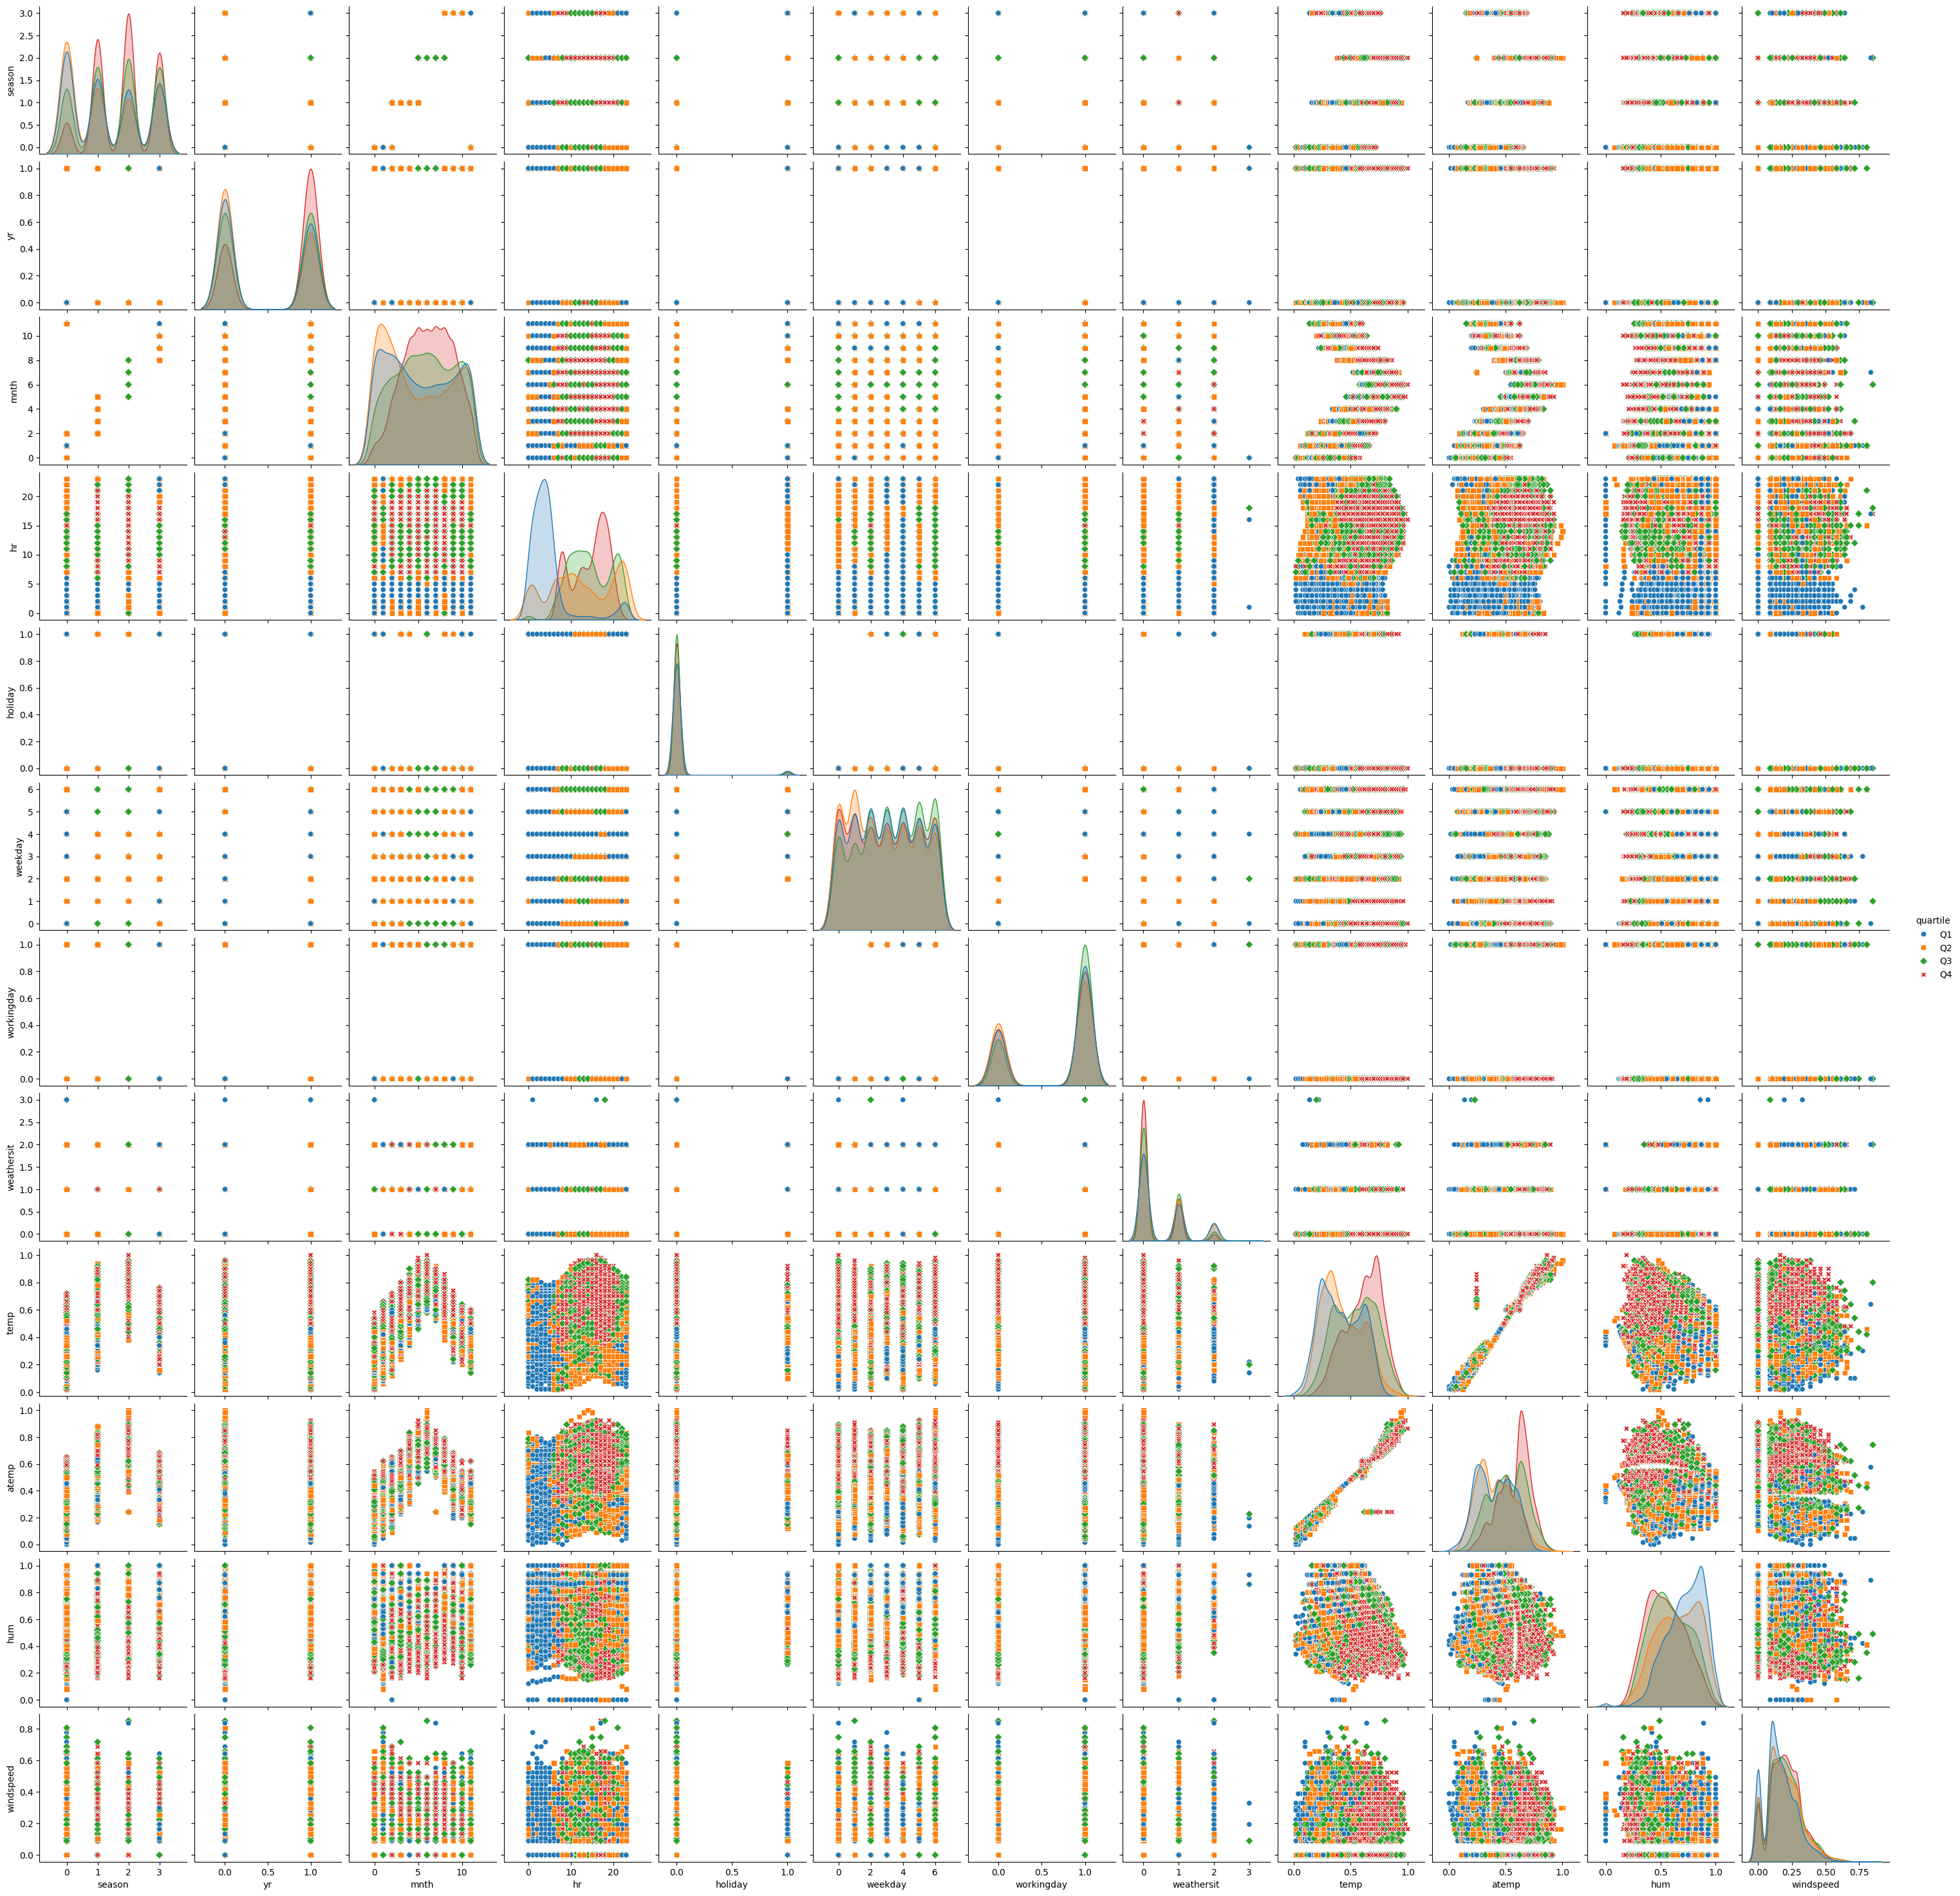

In [ ]:
df_visualization = pd.concat([X_encoded, y], axis=1)

sns.pairplot(df_visualization, hue='quartile', markers=['o', 's', 'D', 'X'])
plt.show()

In [ ]:
k = 10
knn_model = neighbors.KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8188

Classification Report:
              precision    recall  f1-score   support

          Q1       0.90      0.91      0.91       852
          Q2       0.78      0.78      0.78       926
          Q3       0.73      0.72      0.73       858
          Q4       0.86      0.86      0.86       840

    accuracy                           0.82      3476
   macro avg       0.82      0.82      0.82      3476
weighted avg       0.82      0.82      0.82      3476



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [125],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [3]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 125}
Accuracy: 0.7883

Classification Report:
              precision    recall  f1-score   support

          Q1       0.89      0.91      0.90       852
          Q2       0.73      0.74      0.73       926
          Q3       0.69      0.67      0.68       858
          Q4       0.85      0.84      0.84       840

    accuracy                           0.79      3476
   macro avg       0.79      0.79      0.79      3476
weighted avg       0.79      0.79      0.79      3476



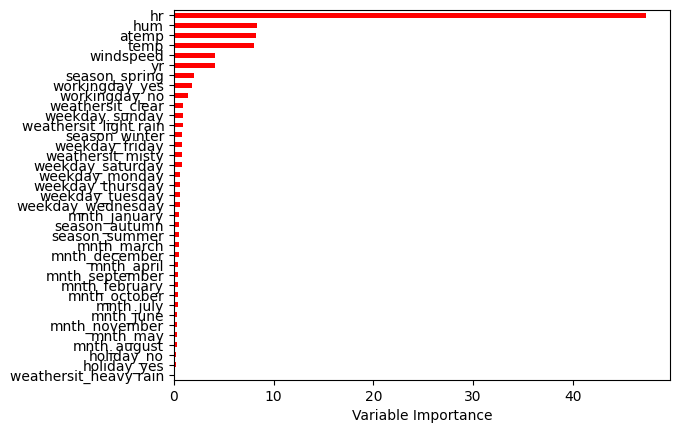

In [27]:


Importance = pd.DataFrame({'Importance':best_model.feature_importances_*100}, index=X_test.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None